In [44]:
from google.colab import files
uploaded = files.upload()

Saving heart.xlsx to heart (1).xlsx


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
df =pd.read_excel("heart.xlsx")

In [47]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [48]:
!pip install seaborn

In [49]:
import seaborn as sns #seaborn is a visualization library

In [50]:
from sklearn.model_selection import train_test_split as tests
from sklearn.tree import DecisionTreeClassifier# for Decision Tree
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve #for confusion matrix
import warnings
warnings.filterwarnings("ignore")

In [51]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [52]:
df.shape

(299, 13)

In [53]:
df.DEATH_EVENT.value_counts() #.value_counts() => to find the valu of a perticuler event(column)

,count
DEATH_EVENT,
0,203
1,96


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

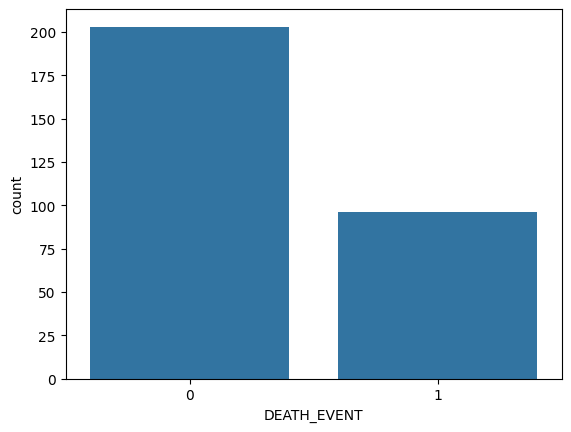

In [54]:
sns.countplot(x='DEATH_EVENT', data=df) #o= alive, 1=death

<Axes: xlabel='diabetes', ylabel='count'>

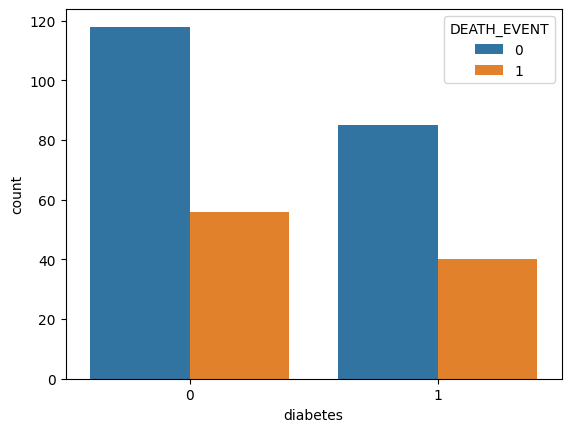

In [55]:
sns.countplot(x ='diabetes',hue='DEATH_EVENT',data=df)

<Axes: xlabel='high_blood_pressure', ylabel='count'>

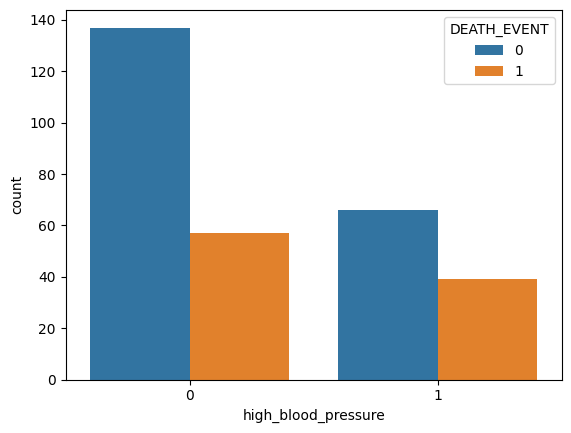

In [56]:
sns.countplot(x ='high_blood_pressure',hue='DEATH_EVENT',data=df)

In [57]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


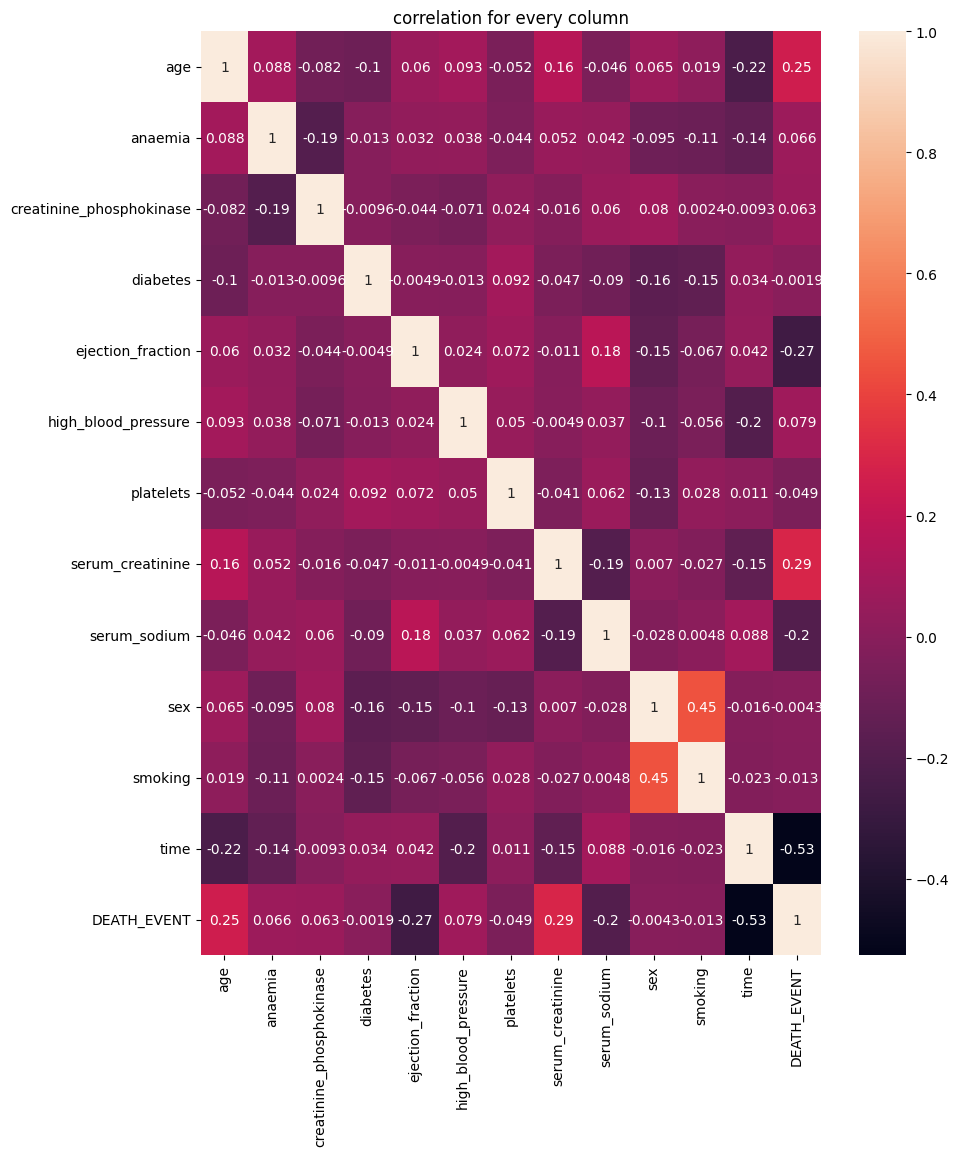

In [58]:
plt.figure(figsize = (10,12))
plt.title("correlation for every column")
sns.heatmap(df.corr(),annot=True)
plt.savefig("heatmap.png")

# ***Separate x,y***

In [59]:
x =df.drop("DEATH_EVENT",axis=1)

In [60]:
y = df[["DEATH_EVENT"]]

In [61]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [62]:
y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


# ***TrainSet & TestSet Separate***

In [63]:
xtrain,xtest,ytrain,ytest =tests(x,y,test_size =0.3,random_state=51)

In [64]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
284,50.0,1,54,0,40,0,279000.0,0.8,141,1,0,250
7,60.0,1,315,1,60,0,454000.0,1.1,131,1,1,10
264,61.0,0,582,1,38,0,147000.0,1.2,141,1,0,237
223,47.0,0,582,0,25,0,130000.0,0.8,134,1,0,201
126,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100


In [65]:
xtrain.shape

(209, 12)

In [66]:
xtest.shape

(90, 12)

In [67]:
dt = DecisionTreeClassifier()

In [68]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

[Text(0.4270833333333333, 0.9444444444444444, 'x[11] <= 73.5\ngini = 0.425\nsamples = 209\nvalue = [145, 64]'),
 Text(0.2013888888888889, 0.8333333333333334, 'x[11] <= 52.0\ngini = 0.282\nsamples = 47\nvalue = [8, 39]'),
 Text(0.3142361111111111, 0.8888888888888888, 'True  '),
 Text(0.125, 0.7222222222222222, 'x[2] <= 56.0\ngini = 0.188\nsamples = 38\nvalue = [4, 34]'),
 Text(0.05555555555555555, 0.6111111111111112, 'x[10] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.027777777777777776, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.19444444444444445, 0.6111111111111112, 'x[2] <= 2018.0\ngini = 0.153\nsamples = 36\nvalue = [3, 33]'),
 Text(0.1388888888888889, 0.5, 'x[3] <= 0.5\ngini = 0.111\nsamples = 34\nvalue = [2, 32]'),
 Text(0.1111111111111111, 0.3888888888888889, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.16666666666666666, 0.3888888888888889, 'x[2] <= 204.0\ngini = 0.23

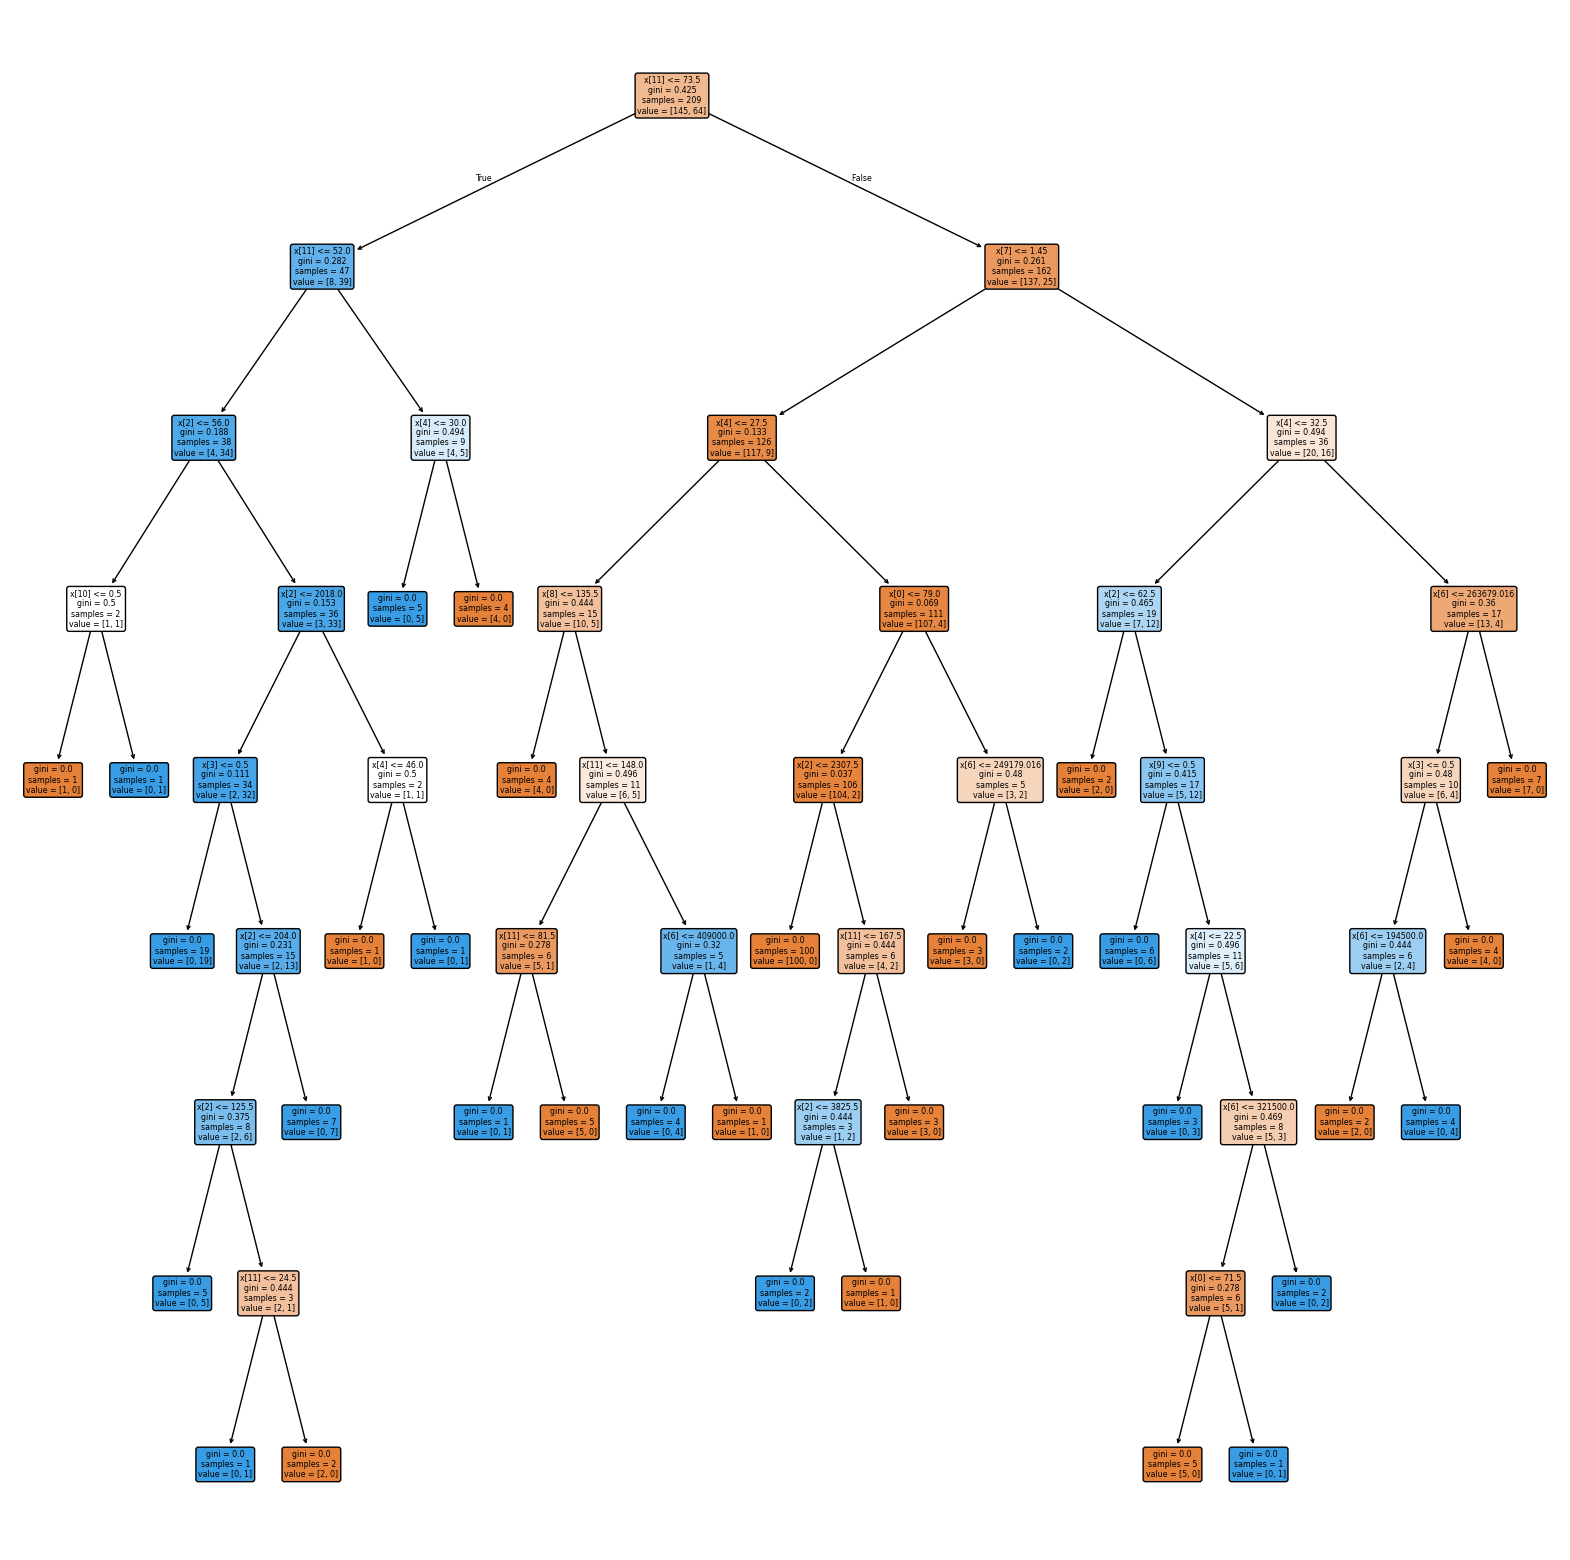

In [73]:
#to see the decisionTree
plt.figure(figsize=(20,20))
tree.plot_tree(dt,filled=True,rounded=True)

In [77]:
plt.savefig("decisionTree.png",dpi=1200)

<Figure size 640x480 with 0 Axes>

In [80]:
pred = dt.predict(xtest)
pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [81]:
np.array(ytest)

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

# ***ConfusionMatrix***

In [82]:
classification_report(ytest,pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.90      0.86        58\n           1       0.78      0.66      0.71        32\n\n    accuracy                           0.81        90\n   macro avg       0.80      0.78      0.79        90\nweighted avg       0.81      0.81      0.81        90\n'

In [83]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        58
           1       0.78      0.66      0.71        32

    accuracy                           0.81        90
   macro avg       0.80      0.78      0.79        90
weighted avg       0.81      0.81      0.81        90



In [85]:
cm = confusion_matrix(ytest,pred)#[[tp,fn][fp,tn]]
cm

array([[52,  6],
       [11, 21]])

Text(0.5, 1.0, 'Confusion Matrix')

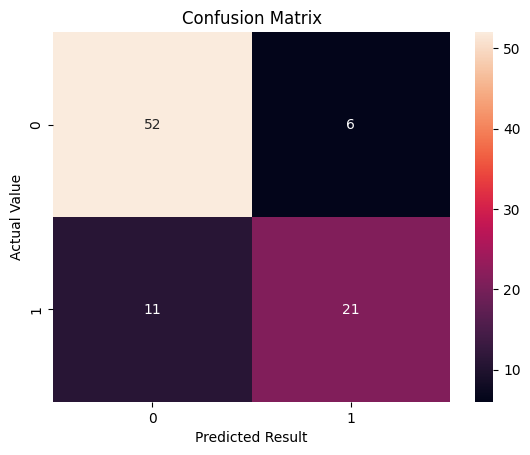

In [89]:
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Value")
plt.title("Confusion Matrix")

In [105]:
plt.savefig("Heatmap2.png")

<Figure size 640x480 with 0 Axes>

In [98]:
tp,fn,fp,tn = confusion_matrix(ytest,pred).reshape(-1) #.reshape(-1) => to manage value error

In [99]:
tp

np.int64(52)

In [100]:
fn

np.int64(6)

In [101]:
accuracy=(tp+tn)/(tp+tn+fp+fn)

In [102]:
accuracy

np.float64(0.8111111111111111)

In [104]:
precision = tp/(tp+fp)
precision

np.float64(0.8253968253968254)

In [114]:
from sklearn.metrics import RocCurveDisplay as pc #roc / auc = precision curve

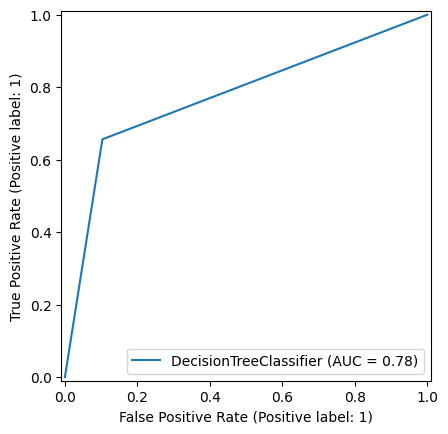

In [115]:
pc.from_estimator(dt, xtest, ytest)

In [116]:
accuracy_score(ytest,pred)

0.8111111111111111

In [119]:
dt.score(xtest, ytest)

0.8111111111111111